# Imports and Options

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import statistics
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
import dataframe_image as dfi

# sns.set_theme(style="darkgrid")

%matplotlib inline

In [7]:
pd.set_option('max_colwidth', None)

# Load Data

In [8]:
df = pd.read_csv(filepath_or_buffer = "./data/datframe_subtask1_2.csv")
dfi.export(df.head(), 'Rohdatensatz_head.png')
df.head()

[0815/204728.450751:INFO:headless_shell.cc(660)] Written to file /var/folders/gz/m10sqzrs1zv7071q82xq75fh0000gn/T/tmpqlr9n9tc/temp.png.
[0815/204728.946627:INFO:headless_shell.cc(660)] Written to file /var/folders/gz/m10sqzrs1zv7071q82xq75fh0000gn/T/tmps74cdmwo/temp.png.


,tweet,binaereKlassifikation,granulareKlassifikation
0,@JanZimmHHB @mopo Komisch das die Realitätsverweigerung immer von linken erbärmlichen Correctiv Accounts ausgeht...,OFFENSE,INSULT
1,"@faznet @Gruene_Europa @SPDEuropa @CDU CDU steht seid Strauss, Kohl, Schäuble, vdLeyen für Korruption, Schwarzgeld, und dies überall...",OFFENSE,ABUSE
2,"@DLFNachrichten Die Gesichter, Namen, Religion der Täter würde zur Aufklärung beitragen...",OTHER,OTHER
3,"@welt Wie verwirrt muss man sein um sich zu weigern die Tatsachen anzuerkennen, das dieser Hass von Ferkel importiert wurde....was bezweckt man damit sich selber so zu belügen, unverständlich",OFFENSE,ABUSE
4,"@hacker_1991 @torben_braga Weil die AfD den Ferkelfunk abschaffen will, deshalb haben die Linken Zecken, Schmarotzer Angst für ihr kacken arbeiten zu müssen, deshalb sind die Führer treu und senden jeden Dreck, Lüge...",OFFENSE,ABUSE


In [9]:
dfi.export(df.describe(), 'Rohdatensatz_describe.png')
df.describe()

[0815/204730.878754:INFO:headless_shell.cc(660)] Written to file /var/folders/gz/m10sqzrs1zv7071q82xq75fh0000gn/T/tmph9tjpk_a/temp.png.


,tweet,binaereKlassifikation,granulareKlassifikation
count,3031,3031,3031
unique,3031,2,4
top,@JanZimmHHB @mopo Komisch das die Realitätsverweigerung immer von linken erbärmlichen Correctiv Accounts ausgeht...,OTHER,OTHER
freq,1,2061,2061


# Data Analysis

In [10]:
df.iloc[:,1].value_counts()

OTHER      2061
OFFENSE     970
Name: binaereKlassifikation, dtype: int64

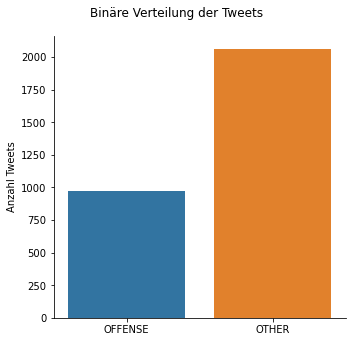

In [11]:
ax0 = sns.catplot(x="binaereKlassifikation", kind="count", data=df)

ax0.fig.suptitle('Binäre Verteilung der Tweets')
ax0.fig.subplots_adjust(top=0.9)
ax0.set(xlabel  = ""
        ,ylabel = "Anzahl Tweets")
plt.savefig("Verteilung_binaere_Klassifikation.png")
plt.show()

In [12]:
df.iloc[:,2].value_counts()

OTHER        2061
INSULT        459
ABUSE         400
PROFANITY     111
Name: granulareKlassifikation, dtype: int64

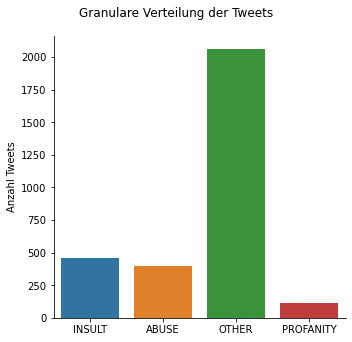

In [13]:
ax0 = sns.catplot(x="granulareKlassifikation", kind="count", data=df)

ax0.fig.suptitle('Granulare Verteilung der Tweets')
ax0.fig.subplots_adjust(top=0.9)
ax0.set(xlabel  = ""
        ,ylabel = "Anzahl Tweets")
plt.savefig("Verteilung_granulare_Klassifikation.png")
plt.show()

# Data Preparation

In [14]:
#df.sample(50)

In [15]:
buffer_array = df.iloc[:,0].to_numpy()

In [26]:
linked_list = []
hashtag_list = []
tweet_list = []
utf_list = []
emoji_list = []
w_o_punctuation_list = []

emoji_list_default = [":D",":)",":(",":/","B)","8)","xD","XD","^^","._."
              ,":-D",":-)",":-(",":-/","B-)","8-)","x-D","X-D",":'-("]

stop_words = ["|LBR|"," ",""]



for i in buffer_array:
    help_array_linked = []
    help_array_hash = []
    help_array_utf = []
    help_array_emoji = []
    help_array_w_o_punctuaton = []
    
    word_list = i.split(" ")
    index_count = 0
    for i in word_list:
        if i.startswith('\\"'): 
            help_list = i.split('\\""')
            for l in help_list:
                if l != '':
                    word_list[index_count] = l
                    break
        if word_list[index_count].startswith('*') and word_list[index_count].endswith('*'):
            word_list[index_count] = i.replace('*', ' ')
        if '&amp;' in word_list[index_count]:
            word_list[index_count] = i.replace('&amp;', 'und')
        if '&lt;3' in word_list[index_count]:
            word_list[index_count] = i.replace('&lt;3', '<3')
        if '&lt;' in word_list[index_count]:
            word_list[index_count] = i.replace('&lt;', 'kleiner als')
        if '&rt;' in word_list[index_count]:
            word_list[index_count] = i.replace('&rt;', 'groesser als')
        if "@" in i:
            help_array_linked.append(i)
        if "#" in i:
            help_array_hash.append(i)
            word_list[index_count] = i.replace("#","")
        if "<U+" in i:
            buffer = i.split("<")
            i = buffer[0]
#             buffer[1]=utf
            word_list[index_count] = i
            for code in buffer[1:]:
                if code[0]!="<":
                    code = "<"+code
                help_array_utf.append(code)
        if i in emoji_list_default:
            help_array_emoji.append(i)
        if i in stop_words:
            word_list.remove(i)

        index_count = index_count+1
        
    for i in help_array_linked:
        word_list.remove(i)
    for i in help_array_emoji:
        word_list.remove(i)
    for i in word_list:
        buffer_word = i.translate(str.maketrans('', '', string.punctuation))
        help_array_w_o_punctuaton.append(buffer_word)
    

        
        
    linked_list.append(help_array_linked)
    hashtag_list.append(help_array_hash)
    tweet_list.append(word_list)
    utf_list.append(help_array_utf)
    emoji_list.append(help_array_emoji)
    w_o_punctuation_list.append(help_array_w_o_punctuaton)

df["Wörter in Tweet"] = tweet_list
df["Wörter pro Tweet"]="-"
df["Tweets ohne Satzzeichen"] = w_o_punctuation_list
df["Wortlänge"] = "-"
df["Durchschnittliche Wortlänge"] = "-"
df["Verlinkungen"]=linked_list
df["Verlinkung pro Tweet"] =  "-"
df["Hashtags"]=hashtag_list
df["Hashtags pro Tweet"] =  "-"
df["utf Codes"]=utf_list
df["utf Codes pro Tweet"] =  "-"
df["Emojis"] = emoji_list
df["Emojis pro Tweet"] =  "-"


In [32]:
# new function to clean tweets
def clean_tweets(tweets: str): 
    replace_dict = {"*": " ",
                   "*amp;": "und",
                   '&lt;3': '<3',
                   '&lt;': 'kleiner als',
                   '&rt;': 'groesser als',
                    "#": "",
                    "<U+": "",
                    "|LBR|": ""
                   }

    tweet_list = []
    for tweet in tweets:
        words_list = tweet.split(" ")
        tweet_words = []
        for word in words_list:
            for key, value in replace_dict.items():
                word = word.replace(key, value)
            if not "@" in word and not "#" in word:
                tweet_words.append(word)
        tweet_list.append(tweet_words)
    
    return tweet_list

In [ ]:
for index, row in df.iterrows():
    word_list = row["Wörter in Tweet"]
    char_list = row["Tweets ohne Satzzeichen"]
    link_list = row["Verlinkungen"]
    hash_list = row["Hashtags"]
    utf_list  = row["utf Codes"]
    emoj_list = row["Emojis"]
    
    word_count = len(word_list)
    link_count = len(link_list)
    hash_count = len(hash_list)
    utf_count  = len(utf_list)
    emoj_count = len(emoj_list)
    
    char_array = []
    
    for i in char_list:
        char_array.append(len(i))
    avg_length = round(statistics.mean(char_array),2)
    
    df.loc[index,"Wörter pro Tweet"] = word_count
    df.loc[index,"Wortlänge"] = char_array
    df.loc[index,"Durchschnittliche Wortlänge"] = avg_length
    df.loc[index,"Verlinkung pro Tweet"] = link_count
    df.loc[index,"Hashtags pro Tweet"] = hash_count
    df.loc[index,"utf Codes pro Tweet"] = utf_count
    df.loc[index,"Emojis pro Tweet"] = emoj_count
    

In [ ]:
for x in df['Wörter in Tweet']:
    index_count = 0
    for w in x:
        x[index_count] = w.lower()
        index_count = index_count + 1


# Analyse Sonderzeichen

In [ ]:
for x in df['Wörter in Tweet']:
        for w in x:
            if not re.search("^[a-zA-Z0-9,.äöüßÄÖÜ!?]*$", w):
                print(w)

In [ ]:
dfi.export(df.head(), 'Bereinigt_&_angereichert_df_head.png')
df.head()

In [ ]:
dfi.export(df[["Wörter pro Tweet","Durchschnittliche Wortlänge","Verlinkung pro Tweet","Hashtags pro Tweet","utf Codes pro Tweet","Emojis pro Tweet"]].astype(int).describe(), 'Bereinigt_&_angereichert_df_describe.png')
df[["Wörter pro Tweet","Durchschnittliche Wortlänge","Verlinkung pro Tweet","Hashtags pro Tweet","utf Codes pro Tweet","Emojis pro Tweet"]].astype(int).describe()

In [ ]:
df.loc[df["Wörter pro Tweet"]==71]

In [ ]:
df.loc[df["Durchschnittliche Wortlänge"]==14]

In [ ]:
df["tweet"].values[1601]

# Exploratory Data Analysis

In [ ]:
df["binaereKlassifikation"].unique()

In [ ]:
df["granulareKlassifikation"].unique()

In [ ]:
df[df["binaereKlassifikation"]=="OTHER"]["granulareKlassifikation"].unique()

In [ ]:
OTHER_df = df[df["granulareKlassifikation"]=="OTHER"]
INSULT_df = df[df["granulareKlassifikation"]=="INSULT"]
ABUSE_df = df[df["granulareKlassifikation"]=="ABUSE"]
PROFANITY_df = df[df["granulareKlassifikation"]=="PROFANITY"]

In [ ]:
print("Tweetlänge bei OTHER: " + str(round(OTHER_df["Wörter pro Tweet"].mean(),2)))
print("Tweetlänge bei INSULT: " + str(round(INSULT_df["Wörter pro Tweet"].mean(),2)))
print("Tweetlänge bei ABUSE: " + str(round(ABUSE_df["Wörter pro Tweet"].mean(),2)))
print("Tweetlänge bei PROFANITY: " + str(round(PROFANITY_df["Wörter pro Tweet"].mean(),2)))

In [ ]:
print("Durchschnittliche Wortlänge bei OTHER: " + str(round(OTHER_df["Durchschnittliche Wortlänge"].mean(),2)))
print("Durchschnittliche Wortlänge bei INSULT: " + str(round(INSULT_df["Durchschnittliche Wortlänge"].mean(),2)))
print("Durchschnittliche Wortlänge bei ABUSE: " + str(round(ABUSE_df["Durchschnittliche Wortlänge"].mean(),2)))
print("Durchschnittliche Wortlänge bei PROFANITY: " + str(round(PROFANITY_df["Durchschnittliche Wortlänge"].mean(),2)))

In [ ]:
print("Durchschnittliche Anzahl Hashtags bei OTHER: " + str(round(OTHER_df["Hashtags pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Hashtags bei INSULT: " + str(round(INSULT_df["Hashtags pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Hashtags bei ABUSE: " + str(round(ABUSE_df["Hashtags pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Hashtags bei PROFANITY: " + str(round(PROFANITY_df["Hashtags pro Tweet"].mean(),2)))

In [ ]:
print("Durchschnittliche Anzahl Verlinkung bei OTHER: " + str(round(OTHER_df["Verlinkung pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Verlinkung bei INSULT: " + str(round(INSULT_df["Verlinkung pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Verlinkung bei ABUSE: " + str(round(ABUSE_df["Verlinkung pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Verlinkung bei PROFANITY: " + str(round(PROFANITY_df["Verlinkung pro Tweet"].mean(),2)))

In [ ]:
print("Durchschnittliche Anzahl Emojis bei OTHER: " + str(round(OTHER_df["Emojis pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Emojis bei INSULT: " + str(round(INSULT_df["Emojis pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Emojis bei ABUSE: " + str(round(ABUSE_df["Emojis pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Emojis bei PROFANITY: " + str(round(PROFANITY_df["Emojis pro Tweet"].mean(),2)))

In [ ]:
print("Durchschnittliche Anzahl utf Codes bei OTHER: " + str(round(OTHER_df["utf Codes pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl utf Codes bei INSULT: " + str(round(INSULT_df["utf Codes pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl utf Codes bei ABUSE: " + str(round(ABUSE_df["utf Codes pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl utf Codes bei PROFANITY: " + str(round(PROFANITY_df["utf Codes pro Tweet"].mean(),2)))

## Plots

In [ ]:
fig, axes = plt.subplots(nrows = 3
                         ,ncols = 2
                         ,figsize=(15,12)
                         ,sharex = False
                        )

fig.suptitle("Quantitave Exploration der Twitterdaten", fontsize=20)

ax0 = sns.boxplot(data = df
                  ,x = "granulareKlassifikation"
                  ,y = "Wörter pro Tweet"
                  ,showfliers = False
                  ,ax = axes[0,0]
                 )

ax0.set_title("Wörter pro Tweet", fontsize = 12)
ax0.set(xlabel  = ""
        ,ylabel = "Anzahl Wörter")

ax1 = sns.boxplot(data = df
                  ,x = "granulareKlassifikation"
                  ,y = "Durchschnittliche Wortlänge"
                  ,showfliers = False
                  ,ax = axes[0,1]
                 )
ax1.set_title("Durchschnittliche Wortlänge", fontsize = 12)
ax1.set(xlabel  = ""
        ,ylabel = "Wortlänge")


ax2 = sns.boxplot(data = df
                  ,x = "granulareKlassifikation"
                  ,y = "Verlinkung pro Tweet"
                  ,showfliers = False
                  ,ax = axes[1,0]
                 )

ax2.set_title("Verlinkung pro Tweet", fontsize = 12)
ax2.set(xlabel  = ""
        ,ylabel = "Anzahl Verlinkungen")

ax3 = sns.boxplot(data = df
                  ,x = "granulareKlassifikation"
                  ,y = "Hashtags pro Tweet"
#                   ,showfliers = False
                  ,ax = axes[1,1]
                 )

ax3.set_title("Hashtags pro Tweet", fontsize = 12)
ax3.set(xlabel  = ""
        ,ylabel = "Anzahl Hashtags")

ax4 = sns.boxplot(data = df
                  ,x = "granulareKlassifikation"
                  ,y = "utf Codes pro Tweet"
#                   ,showfliers = False
                  ,ax = axes[2,0]
                 )

ax4.set_title("utf Codes pro Tweet", fontsize = 12)
ax4.set(xlabel  = ""
        ,ylabel = "Anzahl utf Codes")

ax5 = sns.boxplot(data = df
                  ,x = "granulareKlassifikation"
                  ,y = "Emojis pro Tweet"
#                   ,showfliers = False
                  ,ax = axes[2,1]
                 )

ax5.set_title("Emojis pro Tweet", fontsize = 12)
ax5.set(xlabel  = ""
        ,ylabel = "Anzahl Emojis")

plt.savefig("Quantitave_Exploration.png")

plt.show()
# ax4 = sns.boxplot(data = df
#                   ,x = "granulareKlassifikation"
#                   ,y = "utf Codes pro Tweet"
#                   ,showfliers = False
#                   ,ax = axes[2,0]
#                  )

# ax5 = sns.boxplot(data = df
#                   ,x = "granulareKlassifikation"
#                   ,y = "Emojis pro Tweet"
#                   ,showfliers = False
#                   ,ax = axes[2,1]
#                  )

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.histplot(data = df
                   , x = "Wörter pro Tweet"
                   , color = "blue"
                   , stat = "count"
                   , binwidth = 1
              )

ax.set(xlabel  = "Anzahl Wörter"
        ,ylabel = "Anzahl Tweets")

plt.title('Wörteranzahl pro Tweet',size=20)
plt.savefig("Wörter_pro_Tweet_Gesamt.png")
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows = 2
                         ,ncols = 2
                         ,figsize=(15,10)
                         ,sharex=True
                        )

fig.suptitle("Wörteranzahlverteilung nach Klassifikation", fontsize=20)

ax0 = sns.histplot(data = df[df["granulareKlassifikation"]=="OTHER"]
                    , x = "Wörter pro Tweet"
                    , color = "blue"
                    , stat = "count"
                    , binwidth = 1
                    ,ax = axes[0,0]
              )

ax0.set_title("Klassifikation 'OTHER'", fontsize = 15)
# ax0.set(xticklabels=[])
ax0.set(xlabel  = ""
        ,ylabel = "Anzahl Tweets")

ax1 = sns.histplot(data = df[df["granulareKlassifikation"]=="INSULT"]
                    , x = "Wörter pro Tweet"
                    , color = "blue"
                    , stat = "count"
                    , binwidth = 1
                    ,ax = axes[0,1]
              )

ax1.set_title("Klassifikation 'INSULT'", fontsize = 15)
# ax1.set(xticklabels=[])
ax1.set(xlabel  = ""
        ,ylabel = "")

ax2 = sns.histplot(data = df[df["granulareKlassifikation"]=="PROFANITY"]
                    , x = "Wörter pro Tweet"
                    , color = "blue"
                    , stat = "count"
                    , binwidth = 1
                    ,ax = axes[1,0]
              )

ax2.set_title("Klassifikation 'PROFANITY'", fontsize = 15)
# ax2.set(xticklabels=[])
ax2.set(xlabel  = "Anzahl Wörter"
        ,ylabel = "Anzahl Tweets")

ax3 = sns.histplot(data = df[df["granulareKlassifikation"]=="ABUSE"]
                    , x = "Wörter pro Tweet"
                    , color = "blue"
                    , stat = "count"
                    , binwidth = 1
                    ,ax = axes[1,1]
              )

ax3.set_title("Klassifikation 'ABUSE'", fontsize = 15)
# ax3.set(xticklabels=[])
ax3.set(xlabel  = "Anzahl Wörter"
        ,ylabel = "")

plt.savefig("Wörter_pro_Tweet_Klassen.png")


plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.histplot(data = df
                 , x = "Durchschnittliche Wortlänge"
                 , color = "blue"
                 , stat = "count"
                 , binwidth = 0.15
              )

ax.set(xlabel  = "Durchschnittliche Wortlänge"
        ,ylabel = "Anzahl Tweets")

plt.title('Durchschnittliche Wortlänge pro Tweet',size=20)

plt.savefig("Wortlänge_pro_Tweet_Gesamt.png")

plt.show()

In [ ]:
fig, axes = plt.subplots(nrows = 2
                         ,ncols = 2
                         ,figsize=(15,10)
                         ,sharex=True
                        )

fig.suptitle("Durchschnittliche Wortlänge nach Klassifikation", fontsize=20)

ax0 = sns.histplot(data = df[df["granulareKlassifikation"]=="OTHER"]
                    , x = "Durchschnittliche Wortlänge"
                    , color = "blue"
                    , stat = "count"
                    , binwidth = 0.15
                    ,ax = axes[0,0]
              )

ax0.set_title("Klassifikation 'OTHER'", fontsize = 15)
# ax0.set(xticklabels=[])
ax0.set(xlabel  = ""
        ,ylabel = "Anzahl Tweets")

ax1 = sns.histplot(data = df[df["granulareKlassifikation"]=="INSULT"]
                    , x = "Durchschnittliche Wortlänge"
                    , color = "blue"
                    , stat = "count"
                    , binwidth = 0.15
                    ,ax = axes[0,1]
              )

ax1.set_title("Klassifikation 'INSULT'", fontsize = 15)
# ax1.set(xticklabels=[])
ax1.set(xlabel  = ""
        ,ylabel = "")

ax2 = sns.histplot(data = df[df["granulareKlassifikation"]=="PROFANITY"]
                    , x = "Durchschnittliche Wortlänge"
                    , color = "blue"
                    , stat = "count"
                    , binwidth = 0.15
                    ,ax = axes[1,0]
              )

ax2.set_title("Klassifikation 'PROFANITY'", fontsize = 15)
# ax2.set(xticklabels=[])
ax2.set(xlabel  = "Durchschnittliche Wortlänge"
        ,ylabel = "Anzahl Tweets")

ax3 = sns.histplot(data = df[df["granulareKlassifikation"]=="ABUSE"]
                    , x = "Durchschnittliche Wortlänge"
                    , color = "blue"
                    , stat = "count"
                    , binwidth = 0.15
                    ,ax = axes[1,1]
              )

ax3.set_title("Klassifikation 'ABUSE'", fontsize = 15)
# ax3.set(xticklabels=[])
ax3.set(xlabel  = "Durchschnittliche Wortlänge"
        ,ylabel = "")

plt.savefig("Wortlänge_pro_Tweet_Klassen.png")

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.countplot(data = df
                   , x = "Verlinkung pro Tweet"
                   , color = "blue"
              )
ax.set(xlabel  = "Anzahl Verlinkungen"
        ,ylabel = "Anzahl Tweets")


plt.title('Verlinkungen pro Tweet',size=20)
plt.savefig("Verlinkung_pro_Tweet_Gesamt.png")
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows = 2
                         ,ncols = 2
                         ,figsize=(15,10)
                         ,sharex=True
                        )

fig.suptitle("Verteilung der Verlinkungsanzahl nach Klassifikation", fontsize=20)

ax0 = sns.countplot(data = df[df["granulareKlassifikation"]=="OTHER"]
                    , x = "Verlinkung pro Tweet"
                    , color = "blue"
                    ,ax = axes[0,0]
              )

ax0.set_title("Klassifikation 'OTHER'", fontsize = 15)
ax0.set(xticklabels=[])
ax0.set(xlabel  = ""
        ,ylabel = "Anzahl Tweets")

ax1 = sns.countplot(data = df[df["granulareKlassifikation"]=="INSULT"]
                    , x = "Verlinkung pro Tweet"
                    , color = "blue"
                    ,ax = axes[0,1]
              )

ax1.set_title("Klassifikation 'INSULT'", fontsize = 15)
ax1.set(xticklabels=[])
ax1.set(xlabel  = ""
        ,ylabel = "")

ax2 = sns.countplot(data = df[df["granulareKlassifikation"]=="PROFANITY"]
                    , x = "Verlinkung pro Tweet"
                    , color = "blue"
                    ,ax = axes[1,0]
              )

ax2.set_title("Klassifikation 'PROFANITY'", fontsize = 15)
ax2.set(xticklabels=[])
ax2.set(xlabel  = "Anzahl Verlinkungen"
        ,ylabel = "Anzahl Tweets")

ax3 = sns.countplot(data = df[df["granulareKlassifikation"]=="ABUSE"]
                    , x = "Verlinkung pro Tweet"
                    , color = "blue"
                    ,ax = axes[1,1]
              )

ax3.set_title("Klassifikation 'ABUSE'", fontsize = 15)
# ax3.set(xticklabels=[])
ax3.set(xlabel  = "Anzahl Verlinkungen"
        ,ylabel = "")

plt.savefig("Verlinkung_pro_Tweet_Klassen.png")


plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.countplot(data = df
                   , x = "Hashtags pro Tweet"
                   , color = "blue"
              )
plt.title('Hashtags pro Tweet',size=20)

ax.set(xlabel  = "Anzahl Hashtags"
        ,ylabel = "Anzahl Tweets")

plt.savefig("Hashtags_pro_Tweet_Gesamt.png")

plt.show()

In [ ]:
fig, axes = plt.subplots(nrows = 2
                         ,ncols = 2
                         ,figsize=(15,10)
                         ,sharex=True
                        )

fig.suptitle("Verteilung der Hashtaganzahl nach Klassifikation", fontsize=20)

ax0 = sns.countplot(data = df[df["granulareKlassifikation"]=="OTHER"]
                    , x = "Hashtags pro Tweet"
                    , color = "blue"
                    ,ax = axes[0,0]
              )

ax0.set_title("Klassifikation 'OTHER'", fontsize = 15)
# ax0.set(xticklabels=[])
ax0.set(xlabel  = ""
        ,ylabel = "Anzahl Tweets")

ax1 = sns.countplot(data = df[df["granulareKlassifikation"]=="INSULT"]
                    , x = "Hashtags pro Tweet"
                    , color = "blue"
                    ,ax = axes[0,1]
              )

ax1.set_title("Klassifikation 'INSULT'", fontsize = 15)
# ax1.set(xticklabels=[])
ax1.set(xlabel  = ""
        ,ylabel = "")

ax2 = sns.countplot(data = df[df["granulareKlassifikation"]=="PROFANITY"]
                    , x = "Hashtags pro Tweet"
                    , color = "blue"
                    ,ax = axes[1,0]
              )

ax2.set_title("Klassifikation 'PROFANITY'", fontsize = 15)
# ax2.set(xticklabels=[])
ax2.set(xlabel  = "Anzahl Hashtags"
        ,ylabel = "Anzahl Tweets")

ax3 = sns.countplot(data = df[df["granulareKlassifikation"]=="ABUSE"]
                    , x = "Hashtags pro Tweet"
                    , color = "blue"
                    ,ax = axes[1,1]
              )

ax3.set_title("Klassifikation 'ABUSE'", fontsize = 15)
# ax3.set(xticklabels=[])
ax3.set(xlabel  = "Anzahl Hashtags"
        ,ylabel = "")

plt.savefig("Hashtags_pro_Tweet_Klassen.png")


plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.countplot(data = df
                   , x = "utf Codes pro Tweet"
                   , color = "blue"
              )

plt.title('utf Codes pro Tweet',size=20)

ax.set(xlabel  = "Anzahl utf Codes"
        ,ylabel = "Anzah Tweets")

plt.savefig("utf_pro_Tweet_Gesamt.png")

plt.show()

In [ ]:
fig, axes = plt.subplots(nrows = 2
                         ,ncols = 2
                         ,figsize=(15,10)
                         ,sharex=True
                        )

fig.suptitle("Verteilung der Anzahl von utf Codes nach Klassifikation", fontsize=20)

ax0 = sns.countplot(data = df[df["granulareKlassifikation"]=="OTHER"]
                    , x = "utf Codes pro Tweet"
                    , color = "blue"
                    ,ax = axes[0,0]
              )

ax0.set_title("Klassifikation 'OTHER'", fontsize = 15)
# ax0.set(xticklabels=[])
ax0.set(xlabel  = ""
        ,ylabel = "Anzahl Tweets")

ax1 = sns.countplot(data = df[df["granulareKlassifikation"]=="INSULT"]
                    , x = "utf Codes pro Tweet"
                    , color = "blue"
                    ,ax = axes[0,1]
              )

ax1.set_title("Klassifikation 'INSULT'", fontsize = 15)
# ax1.set(xticklabels=[])
ax1.set(xlabel  = ""
        ,ylabel = "")

ax2 = sns.countplot(data = df[df["granulareKlassifikation"]=="PROFANITY"]
                    , x = "utf Codes pro Tweet"
                    , color = "blue"
                    ,ax = axes[1,0]
              )

ax2.set_title("Klassifikation 'PROFANITY'", fontsize = 15)
# ax2.set(xticklabels=[])
ax2.set(xlabel  = "Anzahl utf Codes"
        ,ylabel = "Anzahl Tweets")

ax3 = sns.countplot(data = df[df["granulareKlassifikation"]=="ABUSE"]
                    , x = "utf Codes pro Tweet"
                    , color = "blue"
                    ,ax = axes[1,1]
              )

ax3.set_title("Klassifikation 'ABUSE'", fontsize = 15)
# ax3.set(xticklabels=[])
ax3.set(xlabel  = "Anzahl utf Codes"
        ,ylabel = "")

plt.savefig("utf_pro_Tweet_Klassen.png")

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.histplot(data = df
                   , x = "Emojis pro Tweet"
                   , color = "blue"
                   , stat = "count"
                   , binwidth = 1
                   , shrink = 0.25
                   , discrete = True
              )
plt.title('Emojis pro Tweet',size=20)

labels = [str(v) if v else '' for v in ax.containers[0].datavalues]
ax.bar_label(ax.containers[0], labels=labels)

ax.set(xlabel  = "Anzahl Emojis"
        ,ylabel = "Anzahl Tweets")

plt.savefig("Emojis_pro_Tweet_Gesamt.png")

plt.show()

In [ ]:
df["Emojis pro Tweet"][df["granulareKlassifikation"]=="PROFANITY"].describe()

In [ ]:
fig, axes = plt.subplots(nrows = 2
                         ,ncols = 2
                         ,figsize=(15,10)
                         ,sharex=True
                        )

fig.suptitle("Verteilung der Anzahl Emojis nach Klassifikation", fontsize=20)

ax0 = sns.histplot(data = df[df["granulareKlassifikation"]=="OTHER"]
                    , x = "Emojis pro Tweet"
                    , color = "blue"
                    , stat = "count"
                    , binwidth = 1
                    , shrink = 0.25
                    , discrete = True
                    ,ax = axes[0,0]
              )

labels = [str(v) if v else '' for v in ax0.containers[0].datavalues]
ax0.bar_label(ax0.containers[0], labels=labels)

ax0.set_title("Klassifikation 'OTHER'", fontsize = 15)
# ax0.set(xticklabels=[])
ax0.set(xlabel  = ""
        ,ylabel = "Anzahl Tweets")

ax1 = sns.histplot(data = df[df["granulareKlassifikation"]=="INSULT"]
                    , x = "Emojis pro Tweet"
                    , color = "blue"
                    , stat = "count"
                    , binwidth = 1
                    , shrink = 0.25
                    , discrete = True
                    ,ax = axes[0,1]
              )


labels = [str(v) if v else '' for v in ax1.containers[0].datavalues]
ax1.bar_label(ax1.containers[0], labels=labels)

ax1.set_title("Klassifikation 'INSULT'", fontsize = 15)
# ax1.set(xticklabels=[])
ax1.set(xlabel  = ""
        ,ylabel = "")

ax2 = sns.histplot(data = df[df["granulareKlassifikation"]=="PROFANITY"]
                    , x = "Emojis pro Tweet"
                    , color = "blue"
                    , stat = "count"
                    , binwidth = 1
                    , shrink = 0.25
                    , discrete = True
                    ,ax = axes[1,0]
              )

labels = [str(v) if v else '' for v in ax2.containers[0].datavalues]
ax2.bar_label(ax2.containers[0], labels=labels)


ax2.set_title("Klassifikation 'PROFANITY'", fontsize = 15)
# ax2.set(xticklabels=[])
ax2.set(xlabel  = "Anzahl Emojis"
        ,ylabel = "Anzahl Tweets")

ax3 = sns.histplot(data = df[df["granulareKlassifikation"]=="ABUSE"]
                    , x = "Emojis pro Tweet"
                    , color = "blue"
                    , stat = "count"
                    , binwidth = 1
                    , shrink = 0.25
                    , discrete = True
                    ,ax = axes[1,1]
              )

labels = [str(v) if v else '' for v in ax3.containers[0].datavalues]
ax3.bar_label(ax3.containers[0], labels=labels)

ax3.set_title("Klassifikation 'ABUSE'", fontsize = 15)
# ax3.set(xticklabels=[])
ax3.set(xlabel  = "Anzahl Emojis"
        ,ylabel = "")

plt.savefig("Emojis_pro_Tweet_Klassen.png")

plt.show()

In [ ]:
nltk.download('stopwords')
# Combine german stopwords from nltk with additional stopwords
german_stopwords1 = []
with open('./data/stop_words_german.txt', encoding="utf-8") as f:
    for line in f:
        line = line.replace('\n','')
        german_stopwords1.append(line)

german_stopwords2 = stopwords.words("german")

german_stopwords = german_stopwords1 + german_stopwords2

In [ ]:
# words in tweet as one string 
data = df
data["tweets_clean"] = [" ".join(word) for word in data["Wörter in Tweet"]] 

# drop unicode emojis and LBR
new_tweet_ls = []
for tweet in data.tweets_clean:
    tweet_sp = tweet.split()
    for word in tweet_sp:
        if any(x in word for x in ["000", "LBR", "lbr"]) :
            tweet = tweet.replace(word, "")
        
    new_tweet_ls.append(tweet)

data["tweets_clean"] = new_tweet_ls


In [ ]:
dfi.export(data.sample(5, random_state=4711), 'Finaler_Datensatz.png')
data.sample(5, random_state=4711)

In [ ]:
data.to_csv('./data/prepared_dataframe.csv',index=False)